In [234]:
# things to change in df:
# remove samples from records df

# add to tags:
# take n_samples from records df and put in tags 
# add mesh heading to tag files
# add columns that says if column is pmid, dnorm
# add tree address for each tag

# in this script
# update with decided on names for columns
# update with fused file DNorm and PMID tags
# SCRs?

# stacked histogram with samples (one color per study)
# make search better
# speed up this script
# analyse summary text more?


# add taxonomy tree with counts
# fancier graph visualizations 

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def query_tree(tdf,search_term):
    mesh_list = []
    tlist = tdf[tdf.mesh_heading==search_term].mesh_treenumbers.tolist()
    for it in tlist:
        nchar = len(it)
        mesh = tdf[tdf.mesh_treenumbers.str[:nchar]==it].mesh_id.to_list()
        mesh_list += mesh
    return np.unique(mesh_list)

def query_tags(tadf, mesh_list, time_range):
    min_date = int(time_range[0].replace('/', ''))
    max_date = int(time_range[1].replace('/', ''))
    match_df = tadf.loc[(np.isin(tadf.mesh_id, mesh_list))&(tadf.PDAT<=max_date)&(tadf.PDAT>=min_date),:] # find matches for the mesh list
    return match_df

In [159]:
# load tree
tree_path = '../data/processed'
tree_file = 'id_name_tree_without_SCR.pkl'
trdf = pd.read_pickle(os.path.join(tree_path, tree_file))
trdf = trdf[trdf.category=='C'] # only disease category

# load tags
tag_path = '../data/DNorm'
tag_file ='disease_tags_dnorm_advanced.pkl'
tadf = pd.read_pickle(os.path.join(tag_path, tag_file))
tadf =tadf[tadf.ont=='MESH']
tadf['mesh_id'] =tadf['unique_id']; tadf = tadf.drop('unique_id',axis=1) # not needed in final file with good names
tadf['PDAT'] = (tadf.PDAT.str[:4]+tadf.PDAT.str[5:7]).astype(int) # turn date into integer: year month

# load records
record_path = '../data/records_samples'
record_file = 'records.pkl'
rdf = pd.read_pickle(os.path.join(record_path, record_file))

# take nsamples from records df and add to tags df
tadf = pd.merge(tadf, rdf[['Id', 'nsamples']], on='Id', how='inner')


In [245]:
# let's look at some rows from the tree df so we can decide what to look for

trdf.loc[trdf.mesh_treenumbers.str.len()<8,:].head()

,mesh_id,mesh_heading,mesh_treenumbers,category
6,D000007,Abdominal Injuries,C26.017,C
12,D000013,Congenital Abnormalities,C16.131,C
135,D000067390,Cold Injury,C26.212,C
138,D000067398,War-Related Injuries,C26.946,C
602,D000070599,Shoulder Injuries,C26.803,C


In [242]:
search_term = 'Coinfection'
min_date = '1990/07'
max_date = '2019/03'

time_range = [min_date, max_date]
mesh_list = query_tree(trdf,search_term)
matchdf = query_tags(tadf, mesh_list, time_range)
matchdf

,Id,PDAT,start,end,disease_tag,tag_type,ont,mesh_id,nsamples
180,200000514,200307,205,217,co-infection,Disease,MESH,D060085,7.0
1280,200002505,200504,41,53,co-infection,Disease,MESH,D060085,11.0
1282,200002505,200504,257,269,co-infection,Disease,MESH,D060085,11.0
28432,200025839,201106,699,711,Co-infection,Disease,MESH,D060085,17.0
39573,200034205,201203,483,507,polymicrobial infections,Disease,MESH,D060085,101.0
39578,200034205,201203,1017,1030,co-infections,Disease,MESH,D060085,101.0
45028,200038542,201206,4,19,HCV coinfection,Disease,MESH,D060085,53.0
46953,200040008,201210,395,407,co-infection,Disease,MESH,D060085,12.0
46970,200040012,201208,1481,1503,bacterial co-infection,Disease,MESH,D060085,190.0
54070,200045633,201303,1189,1201,co-infection,Disease,MESH,D060085,13.0


In [246]:
# counts per year
matchdf['dum'] = 1
ts = matchdf[['Id', 'PDAT', 'dum']].groupby(['Id', 'PDAT']).mean().reset_index()[['Id', 'PDAT']]
ts['year'] = ts.PDAT.astype(str).str[:4]
ts['month'] = ts.PDAT.astype(str).str[4:]
cpy = ts.groupby('year').size().reset_index(name='c')

# samples per year
ts = matchdf.groupby(['Id', 'PDAT']).nsamples.mean().reset_index()
ts['year'] = ts.PDAT.astype(str).str[:4]
ts['month'] = ts.PDAT.astype(str).str[4:]
spy = ts.groupby('year').nsamples.sum().reset_index()



# word clouds
tag_cloud = matchdf[['Id', 'disease_tag']].drop_duplicates(subset=['Id', 'disease_tag'])
text = " ".join(tag_cloud.disease_tag.tolist())
tagcloud = WordCloud().generate(text)

# pie chart
s_types = tag_cloud.disease_tag.value_counts().reset_index()
s_types.columns = ['subtype','n']
# take first n rows
s_types = s_types.iloc[:16,:]

title_cloud = rdf.loc[np.isin(rdf.Id,matchdf.Id.unique()),:].title.to_list()
text = " ".join(title_cloud)
titlecloud = WordCloud(height=600,width=1200).generate(text)

summary_cloud = rdf.loc[np.isin(rdf.Id,matchdf.Id.unique()),:].summary.to_list()
text = " ".join(title_cloud)
summarycloud = WordCloud(height=600,width=1200).generate(text)



/Users/clairechambers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


time series


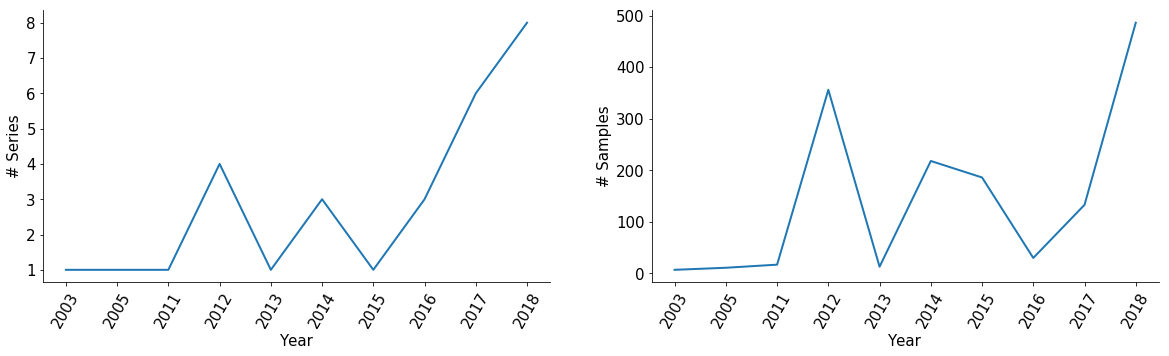

pie chart of tags


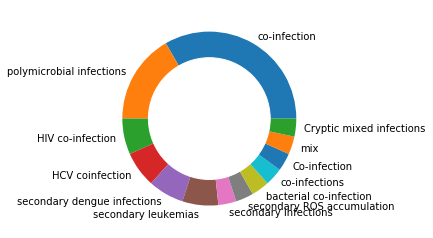

Tag cloud


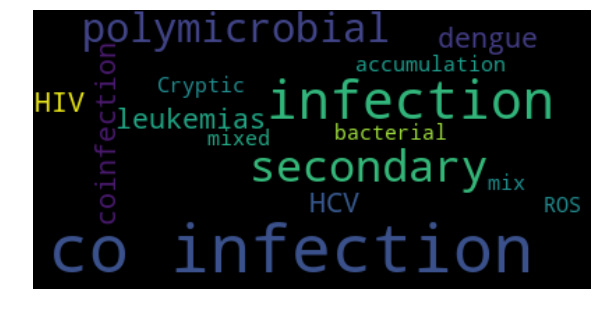

Title cloud


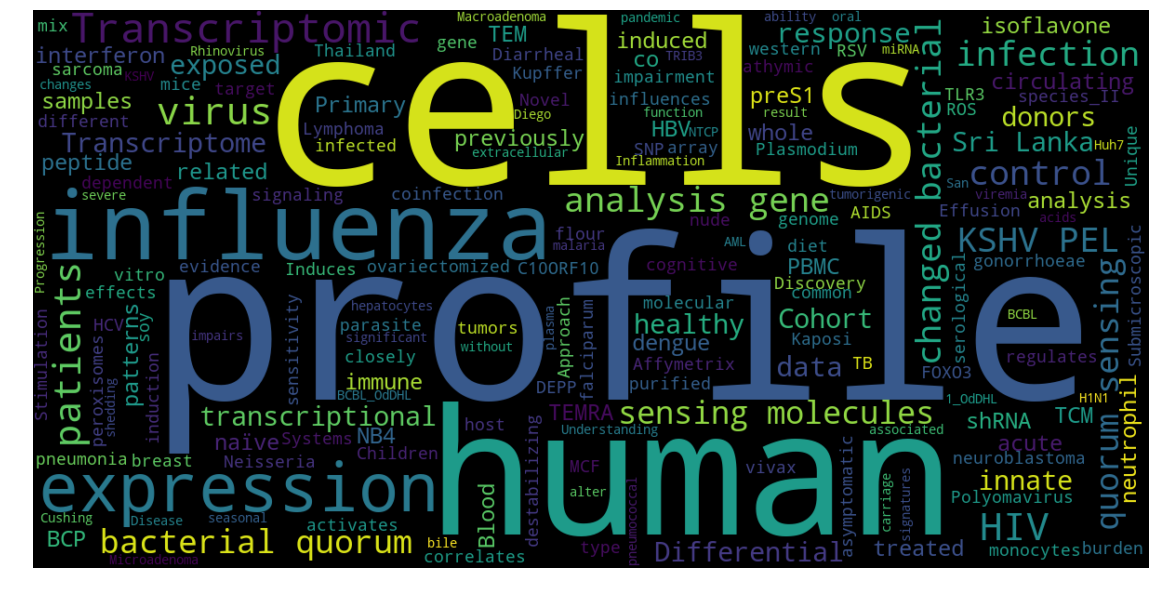

Summary cloud


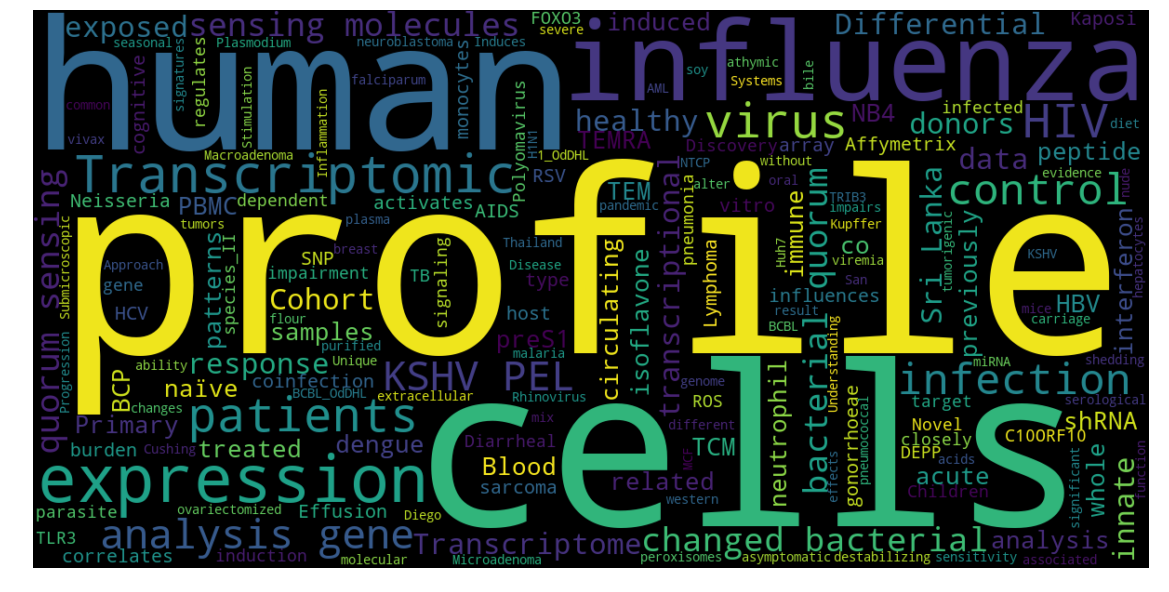

In [249]:
label_font = 15
fig,axs =plt.subplots(1,2, figsize=(20,5))

print('time series')

ax = axs[0]
ax.plot(cpy.year, cpy.c, lw = 2)
ax.set_xticks(cpy.year)
ax.set_xticklabels(cpy.year, rotation=60,fontsize=label_font)
ax.set_yticklabels(ax.get_yticks().astype(int),fontsize=label_font)
ax.set_xlabel('Year',fontsize = label_font)
ax.set_ylabel('# Series',fontsize = label_font)

# weighted by nsamples
ax = axs[1]
ax.plot(spy.year, spy.nsamples, lw = 2)
ax.set_xticks(spy.year)
ax.set_xticklabels(spy.year, rotation=60,fontsize=label_font)
ax.set_yticklabels(ax.get_yticks().astype(int),fontsize=label_font)
ax.set_xlabel('Year',fontsize = label_font)
ax.set_ylabel('# Samples',fontsize = label_font)
sns.despine()
plt.show()

# pie chart
print('pie chart of tags')
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(list(s_types.n), labels=list(s_types.subtype))
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


# tag cloud
print('Tag cloud')
fig,axs =plt.subplots(1,1, figsize=(10,7.5))
plt.imshow(tagcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# title cloud
print('Title cloud')
fig,axs =plt.subplots(1,1, figsize=(20,15))
plt.imshow(titlecloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# summary cloud
print('Summary cloud')
fig,axs =plt.subplots(1,1, figsize=(20,15))
plt.imshow(summarycloud, interpolation='bilinear')
plt.axis("off")
plt.show()

